## Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline

## Fonction de Rosenbrock

$R(x, y) = (1 - x)^2 + 100(y - x^2)^2$

In [5]:
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

rosenbrock(np.array([1, 1]))

0

## Gradients de Rosenbrock

$\large\frac{\partial R}{\partial x} = 400x^3 - 400xy + 2x - 2$

$\large\frac{\partial R}{\partial y} = 200(y - x^2)$

In [6]:
def grad_rosenbrock(x):
    dx1 = 400 * x[0]**3 - 400 * x[0] * x[1] + 2 * x[0] - 2
    dx2 = 200 * (x[1] - x[0]**2)
    return np.array([dx1, dx2])

## Gradient Descent

In [75]:
def plot_grad_x(grads, xs):
    grads = np.array(grads)
    plt.plot(np.arange(len(grads[:, 0])), grads[:, 0], label='dx1')
    plt.plot(np.arange(len(grads[:, 1])), grads[:, 1], label='dx2')
    plt.legend()
    plt.title('Gradients')
    plt.show()
    xs = np.array(xs)
    plt.plot(np.arange(len(xs[:, 0])), xs[:, 0], label='x1')
    plt.plot(np.arange(len(xs[:, 1])), xs[:, 1], label='x2')
    plt.legend()
    plt.title('Gradients')
    plt.show()

def gdescent_fixe(f, df, x0, alpha=0.01, eps=0.0000001, max_iter=1000, plot=False, no_print=False):
    x = x0
    grads = []
    xs = [x]
    for i in range(max_iter):
        # Compute x(n+1)
        grads.append(grad_rosenbrock(x))
        new_x = x - alpha * grads[-1]
        
        # Compute residual
        res = np.linalg.norm(new_x - x)
        if res < eps:
            if not no_print:
                print(f'Solution found in {i} iterations.')
            if plot:
                plot_grad_x(grads, xs)
            return new_x
        
        x = new_x
        xs.append(x)
        
    if not no_print:
        print(f'No solutions was found after {max_iter} iterations.')
    if plot:
        plot_grad_x(grads, xs)
    return None

In [72]:
gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.0005, max_iter=50000)

Solution found in 38963 iterations.


array([0.99977652, 0.99955219])

In [38]:
gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.0009, max_iter=50000)

Solution found in 23162 iterations.


array([0.99987586, 0.99975124])

In [39]:
gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.0011, max_iter=50000)

Solution found in 19293 iterations.


array([0.99989842, 0.99979644])

c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
c:\users\maxim\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


No solutions was found after 50000 iterations.


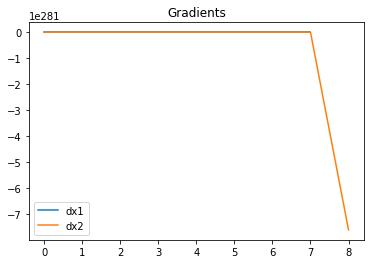

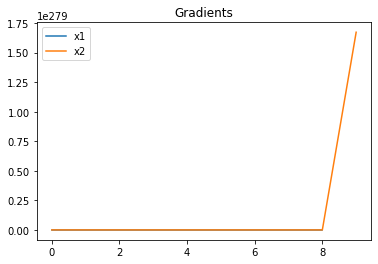

In [69]:
gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.0022, max_iter=50000, plot=True)

No solutions was found after 50000 iterations.


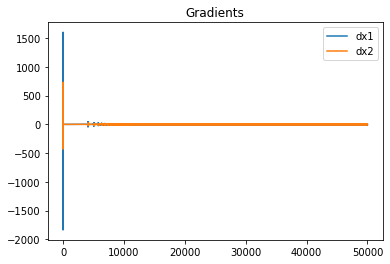

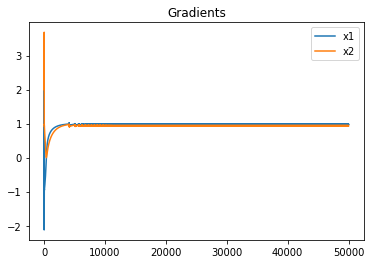

In [68]:
gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.0021, max_iter=50000, plot=True)

Solution found in 8058 iterations.


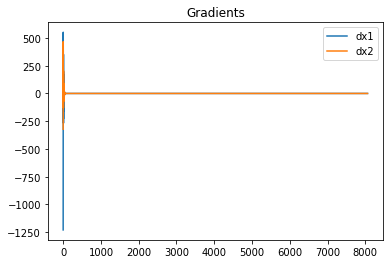

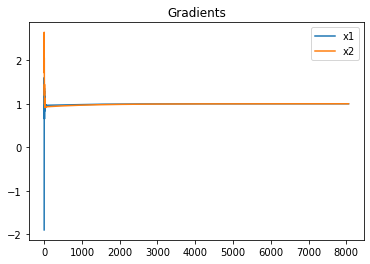

array([0.99994415, 0.99988808])

In [65]:
gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.002, max_iter=50000, plot=True)

On voit que le choix du **learning rate** alpha est déterminant dans la convergence de l'algorithme. Ici, on voit qu'il y a un très mince intervalle de valeurs qui permettent de converger en moins de 10000 itérations.

**0.002** est la valeur qui nous fait converger le plus vite. Quand on dépasse celle-ci ne serait-ce que d'un dix-millième, l'algorithme ne converge plus en moins de 50000 itérations. Si on dépasse encore un peu plus, on voit même les gradients exploser très rapidement, emmenant les valeurs de x avec eux. 

**Timing de l'algorithme:**

In [76]:
%timeit gdescent_fixe(rosenbrock, grad_rosenbrock, np.array([-1.9, 2.0]), alpha=0.002, max_iter=50000, no_print=True)

76.4 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Gold Section

In [2]:
def f(x):
    return np.exp(x) - 2 * x

def df(x):
    return np.exp(x) - 2

In [9]:
def gold_section(f, inter=[0, 2], eps=0.0000001, max_iter=1000):
    ro = (np.sqrt(5) - 1) / 2
    a, b = inter[0], inter[1]
    
    xm = ro * a + (1 - ro) * b
    xp = a + b - xm
    
    vm = f(xm)
    vp = f(xp)
    
    for i in range(max_iter):
        print(f'[{a}, {b}]')
        if vm <= vp:
            b = xp
            xp = xm
            xm = a + b - xp
            
            vp = vm
            vm = f(xm)
        else:
            a = xm
            xm = xp
            xp = a + b - xm
            
            vm = vp
            vp = f(xp)
        
        # Test convergence
        if b - a < eps:
            x = (a + b) / 2
            print(f'Found solution {x} in {i + 1} iterations.')
            return (a + b) / 2
    
    print(f'Did not find any solution in {max_iter} iterations.')
    return None

In [10]:
gold_section(f)

[0, 2]
[0, 1.2360679774997898]
[0.4721359549995796, 1.2360679774997898]
[0.4721359549995796, 0.9442719099991592]
[0.4721359549995796, 0.7639320225002102]
[0.5835921350012612, 0.7639320225002102]
[0.6524758424985286, 0.7639320225002102]
[0.6524758424985286, 0.7213595499957961]
[0.678787077491382, 0.7213595499957961]
[0.678787077491382, 0.7050983124842354]
[0.6888370749726747, 0.7050983124842354]
[0.6888370749726747, 0.6988870724539673]
[0.6888370749726747, 0.6950483150029427]
[0.6912095575519182, 0.6950483150029427]
[0.6926758324236992, 0.6950483150029427]
[0.6926758324236992, 0.6941421072954803]
[0.6926758324236992, 0.6935820401311616]
[0.693021972966843, 0.6935820401311616]
[0.693021972966843, 0.6933681135099867]
[0.693021972966843, 0.6932358995880179]
[0.6931036856660491, 0.6932358995880179]
[0.6931036856660491, 0.6931853983652552]
[0.6931348971424924, 0.6931853983652552]
[0.6931348971424924, 0.6931661086189358]
[0.6931348971424924, 0.6931541868888118]
[0.6931422651586878, 0.69315418

0.6931471802754299